<a href="https://colab.research.google.com/github/chrislee973/Build-Week-1/blob/master/Build_1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import nltk
nltk.download('brown')
nltk.download('gutenberg')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [208]:
from nltk.corpus import brown
from nltk.corpus import gutenberg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns

In [209]:
bible_text = gutenberg.words('bible-kjv.txt')[6:]
bible_text

['The', 'Old', 'Testament', 'of', 'the', 'King', ...]

In [210]:
len(bible_text)

1010648

In [211]:
#Load in the genres

genres = brown.categories()

#Exploratory Analysis

In [212]:
news_text = brown.words(categories='news')

In [213]:
news_text[:15]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced']

Distribution of corpus lengths of each of the genres

In [214]:
genre_lengths = []

for cat in brown.categories(): 
  cat_words = brown.words(categories = cat)
  genre_lengths.append(len(cat_words))
  print(f"The {cat} category contains {len(cat_words)} words.")

The adventure category contains 69342 words.
The belles_lettres category contains 173096 words.
The editorial category contains 61604 words.
The fiction category contains 68488 words.
The government category contains 70117 words.
The hobbies category contains 82345 words.
The humor category contains 21695 words.
The learned category contains 181888 words.
The lore category contains 110299 words.
The mystery category contains 57169 words.
The news category contains 100554 words.
The religion category contains 39399 words.
The reviews category contains 40704 words.
The romance category contains 70022 words.
The science_fiction category contains 14470 words.


In [215]:
genre_df = pd.DataFrame(data = genre_lengths, index=brown.categories(), columns = ['count']).sort_values(by='count', ascending=False)
genre_df

count
learned          181888
belles_lettres   173096
lore             110299
news             100554
hobbies           82345
government        70117
romance           70022
adventure         69342
fiction           68488
editorial         61604
mystery           57169
reviews           40704
religion          39399
humor             21695
science_fiction   14470

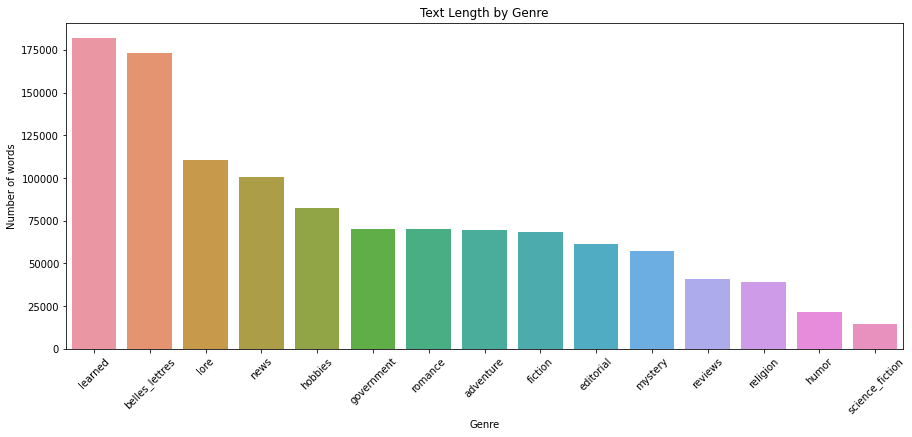

In [216]:
plt.figure(figsize=(15,6))
sns.barplot(x = genre_df.index, y = genre_df['count'], )
plt.xticks(rotation = 45)

plt.title('Text Length by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of words')
plt.show()

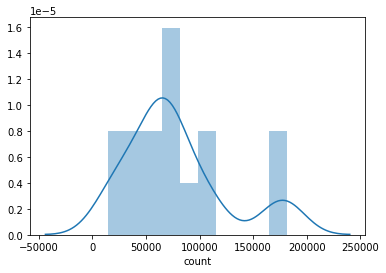

In [217]:
sns.distplot(genre_df['count'], bins=10)

In [218]:
from collections import Counter
        
#Function that performs preprocessing. Lowercases all words and filters out punctuation and numbers.

NUMS = '1234567890'
PUNC = string.punctuation + "''``--"
FILTER_WORDS = NUMS+PUNC

class Dist(Counter): 
    "A Distribution of {outcome: frequency} pairs."

def preprocess(corpus): 
  #Input: A list of tokens
  #Output: A list of preprocessed tokens.  
  
  #Initialize result list
  result = []

  for token in corpus: 
    if token not in FILTER_WORDS: 
      result.append(token.lower())
  return result


def get_freq_dist(corpus): 
  '''
  Input: Corpus of text
  Output: Frequency distribution of processed words in the corpus
  '''
  
  #Process the corpus
  pre = preprocess(corpus)

  #Make frequency distribution of the words from the preprocessed corpus
  freq_dist = Dist(pre)

  #Sort the frequency distribution in descending order
  freq_dist = {k:v for k,v in sorted(freq_dist.items(), key = lambda x:x[1], reverse=True)}
  
  return freq_dist




#Concatenate the lists of tokens from all the genres to form a holistic list that contains every single word from the Brown Corpus. 

TODO: Should I preprocess each genre list first and then concatenate? Or concatenate and then call freq_dist on the whole thing?

In [219]:
brown_words = []

for genre in brown.categories(): 
  genre_words = brown.words(categories=genre)
  brown_words += genre_words

In [220]:
len(brown_words)

1161192

In [221]:
brown_dist = get_freq_dist(brown_words)
brown_dist

{'the': 69971,
 'of': 36412,
 'and': 28853,
 'to': 26158,
 'a': 23195,
 'in': 21337,
 'that': 10594,
 'is': 10109,
 'was': 9815,
 'he': 9548,
 'for': 9489,
 'it': 8760,
 'with': 7289,
 'as': 7253,
 'his': 6996,
 'on': 6741,
 'be': 6377,
 'at': 5372,
 'by': 5306,
 'i': 5164,
 'this': 5145,
 'had': 5133,
 'not': 4610,
 'are': 4394,
 'but': 4381,
 'from': 4370,
 'or': 4206,
 'have': 3942,
 'an': 3740,
 'they': 3620,
 'which': 3561,
 'one': 3292,
 'you': 3286,
 'were': 3284,
 'her': 3036,
 'all': 3001,
 'she': 2860,
 'there': 2728,
 'would': 2714,
 'their': 2669,
 'we': 2652,
 'him': 2619,
 'been': 2472,
 'has': 2437,
 'when': 2331,
 'who': 2252,
 'will': 2245,
 'more': 2215,
 'if': 2198,
 'no': 2139,
 'out': 2097,
 'so': 1985,
 'said': 1961,
 'what': 1908,
 'up': 1890,
 'its': 1858,
 'about': 1815,
 'into': 1791,
 'than': 1790,
 'them': 1788,
 'can': 1772,
 'only': 1748,
 'other': 1702,
 'new': 1635,
 'some': 1618,
 'could': 1601,
 'time': 1598,
 'these': 1573,
 'two': 1412,
 'may': 1402,

#Obtain Frequency Distributions for each genre

In [222]:
genre_freqdict = {}
for genre in brown.categories(): 
  genre_text = brown.words(categories=genre)
  genre_freqdict[genre] = get_freq_dist(genre_text)

In [223]:
genre_freqdict.keys()

dict_keys(['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction'])

In [224]:
scifi_dist = genre_freqdict['science_fiction']
scifi_dist

{'the': 723,
 'of': 329,
 'to': 306,
 'and': 294,
 'a': 236,
 'was': 200,
 'he': 191,
 'in': 164,
 'it': 158,
 'had': 143,
 'that': 131,
 'his': 102,
 'for': 100,
 'i': 98,
 'you': 96,
 'not': 95,
 'on': 90,
 'but': 89,
 'her': 82,
 'be': 80,
 'would': 80,
 'with': 73,
 'as': 72,
 'they': 67,
 'all': 66,
 'no': 62,
 'have': 61,
 'this': 61,
 'she': 59,
 'were': 59,
 'him': 58,
 'at': 55,
 'is': 50,
 'could': 49,
 'them': 47,
 'from': 46,
 'said': 45,
 'we': 45,
 'there': 44,
 'what': 41,
 'their': 41,
 'been': 40,
 'one': 39,
 'did': 38,
 'by': 37,
 'out': 36,
 'time': 34,
 'up': 33,
 'which': 33,
 'an': 33,
 'my': 32,
 'or': 31,
 'if': 29,
 'when': 28,
 'now': 27,
 'are': 26,
 'do': 26,
 'so': 26,
 'ekstrohm': 26,
 'helva': 26,
 'mercer': 26,
 'long': 25,
 'like': 25,
 'know': 25,
 'people': 23,
 'hal': 23,
 'into': 22,
 'other': 22,
 'more': 21,
 'me': 21,
 "b'dikkat": 21,
 'mike': 20,
 'only': 20,
 'some': 20,
 'ship': 20,
 'back': 19,
 'any': 19,
 'then': 18,
 'man': 18,
 'your': 1

In [225]:
news_dist = genre_freqdict['news']
news_dist

{'the': 6386,
 'of': 2861,
 'and': 2186,
 'to': 2144,
 'a': 2130,
 'in': 2020,
 'for': 969,
 'that': 829,
 'is': 733,
 'was': 717,
 'on': 691,
 'he': 642,
 'at': 636,
 'with': 567,
 'be': 526,
 'as': 517,
 'by': 504,
 'it': 478,
 'his': 428,
 'said': 406,
 'will': 389,
 'from': 353,
 'are': 330,
 'this': 320,
 'an': 311,
 'has': 301,
 'but': 283,
 'had': 281,
 'who': 268,
 'they': 267,
 'have': 265,
 'not': 257,
 'mrs.': 253,
 'were': 252,
 'would': 246,
 'which': 245,
 'new': 241,
 'their': 231,
 'one': 213,
 'been': 212,
 'there': 189,
 'more': 183,
 'all': 181,
 'i': 179,
 'its': 178,
 'last': 177,
 'or': 174,
 'two': 174,
 'mr.': 170,
 'when': 169,
 'up': 168,
 'other': 164,
 'out': 162,
 'first': 158,
 'state': 153,
 'after': 151,
 'about': 147,
 'year': 142,
 'president': 142,
 'than': 138,
 'home': 132,
 'also': 129,
 'her': 121,
 'no': 120,
 'over': 119,
 'into': 115,
 'some': 113,
 'only': 111,
 'we': 107,
 'made': 107,
 'time': 103,
 'if': 103,
 'years': 102,
 'three': 101,
 

#Log-Log plot of rank v freq for the Brown Corpus

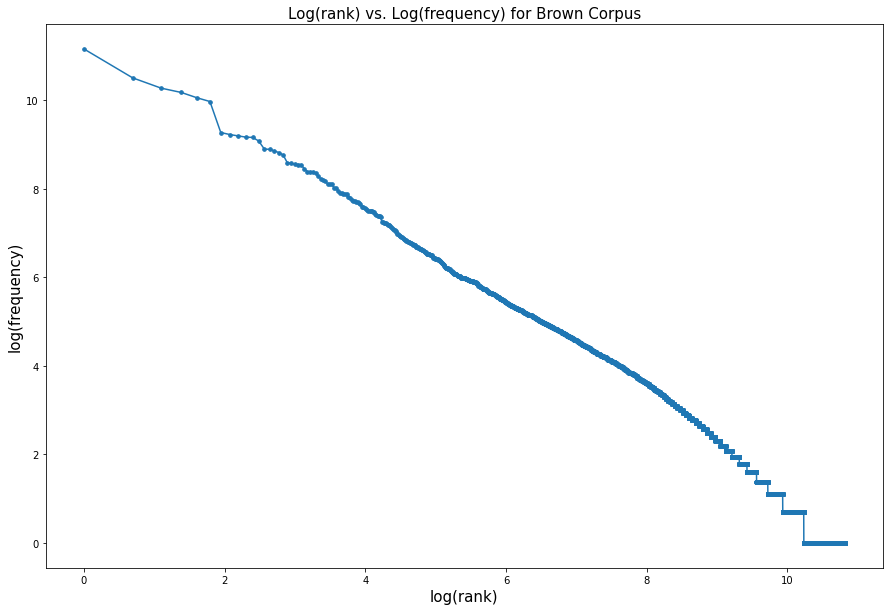

In [226]:
fig = plt.subplots(figsize=(15,10))



plt.scatter(x=np.log(range(1,len(brown_dist)+1)), y=np.log(list(brown_dist.values())), s=13)
plt.plot(np.log(range(1,len(brown_dist)+1)), np.log(list(brown_dist.values())))


plt.xlabel('log(rank)', fontsize = 15)
plt.ylabel('log(frequency)', fontsize = 15)
plt.title('Log(rank) vs. Log(frequency) for Brown Corpus', fontsize = 15)
plt.show()

#Log-Log plot of rank vs. frequency for every genre

Should I stick with regplot (first plot) or is the regplot look too cluttered and I should just do a scatter-lineplot (second plot) instead???

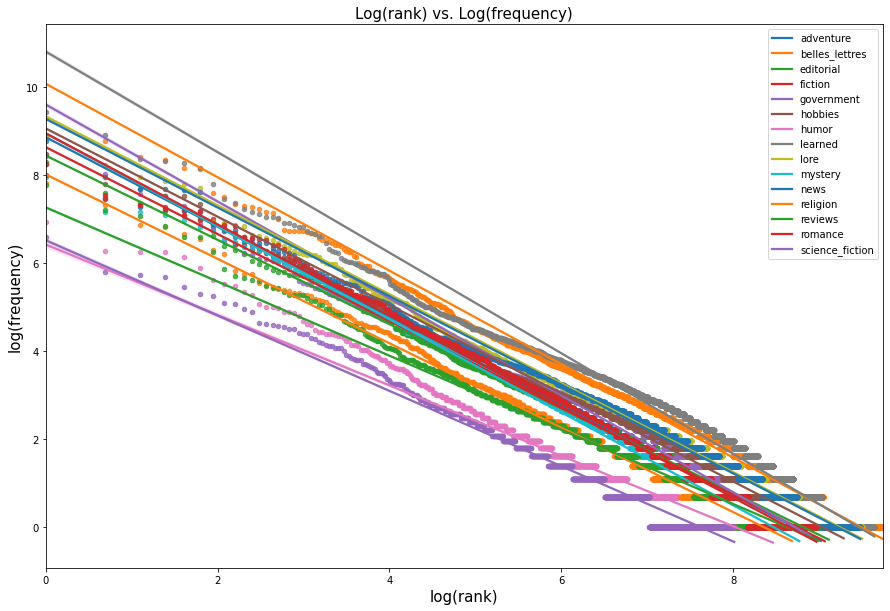

In [227]:
fig = plt.subplots(figsize=(15,10))
genres = brown.categories()
count=0

for genre in genres: 
  freq_dist = genre_freqdict[genre]
  sns.regplot(x=np.log(range(1,len(freq_dist)+1)), y=np.log(list(freq_dist.values())), scatter_kws={'s':20})


plt.xlabel('log(rank)', fontsize = 15)
plt.ylabel('log(frequency)', fontsize = 15)
plt.title('Log(rank) vs. Log(frequency)', fontsize = 15)
plt.legend(genres)
plt.show()

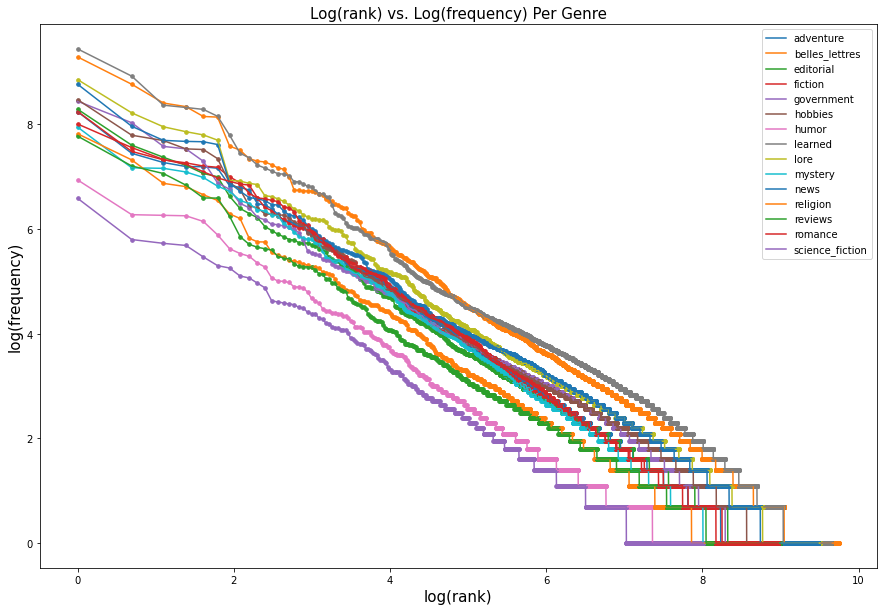

In [228]:
fig = plt.subplots(figsize=(15,10))
genres = brown.categories()
count=0

for genre in genres: 
  freq_dist = genre_freqdict[genre]
  plt.scatter(x=np.log(range(1,len(freq_dist)+1)), y=np.log(list(freq_dist.values())), s=13)
  plt.plot(np.log(range(1,len(freq_dist)+1)), np.log(list(freq_dist.values())))


plt.xlabel('log(rank)', fontsize = 15)
plt.ylabel('log(frequency)', fontsize = 15)
plt.title('Log(rank) vs. Log(frequency) Per Genre', fontsize = 15)
plt.legend(genres)
plt.show()

#Rank v. Freq scatterplot for Brown Corpus

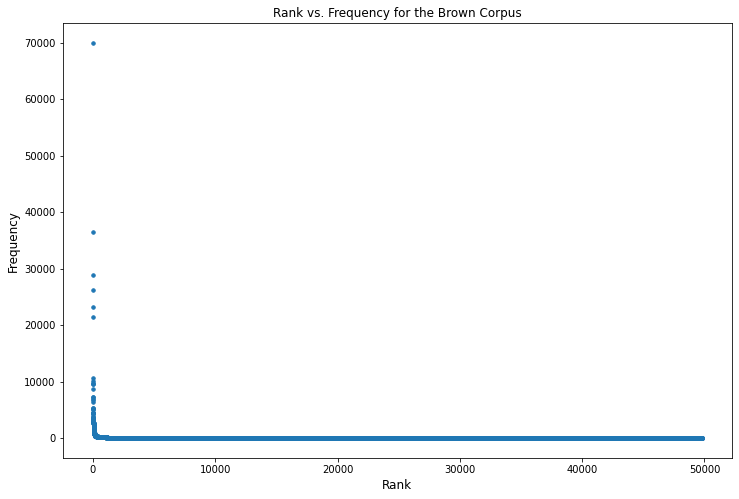

In [229]:
plt.figure(figsize = (12,8))
plt.scatter(x =range(1,len(brown_dist)+1), y=list(brown_dist.values()), s=12)

plt.title('Rank vs. Frequency for the Brown Corpus', fontsize=12)
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

#Rank v. Frequency scatterplot for every genre

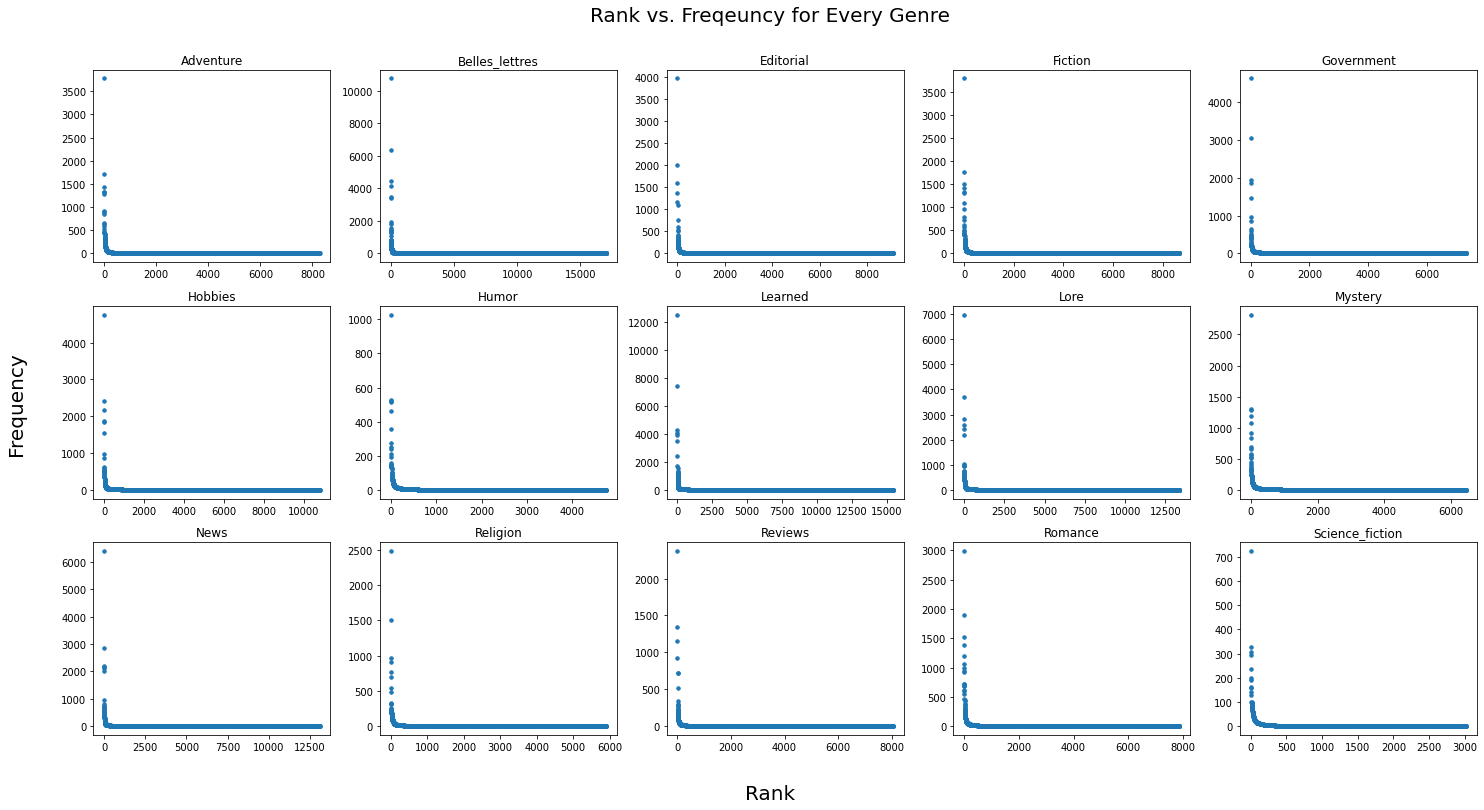

In [230]:
# 3x5 chart with each chart being the scatterplot for a particular genre

genres = brown.categories()
count=0

fig, ax = plt.subplots(3,5, figsize = (20,10))

#Loop over the rows
for i in range(3): 
  #Loop over the columns
  for j in range(5): 

    #get the genre we want to plot
    genre = genres[count]

    #get the frequency distribution of the genre
    freq_dist = genre_freqdict[genre]

    #Create the scatterplot for that genre at location [i,j]
    ax[i,j].scatter(x =range(1,len(freq_dist)+1), y=list(freq_dist.values()), s=12)
    ax[i,j].set_title(f"{genre.capitalize()}")
    #ax[i,j].set_xlabel('Rank')
    #ax[i,j].set_ylabel('Frequency')

    #increment count to move onto next genre
    count+=1

fig.tight_layout()
fig.text(0.5, -0.05, 'Rank', ha='center', fontsize=20)
fig.text(-0.03, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 1.03, 'Rank vs. Freqeuncy for Every Genre', ha='center', fontsize=20)

#fig.suptitle('Rank vs. Freqeuncy for Every Genre')


plt.show()

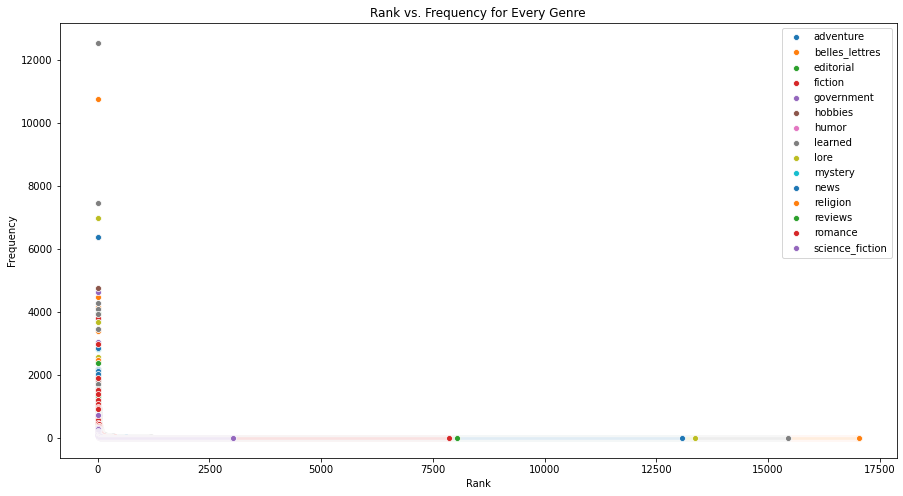

In [231]:
plt.figure(figsize = (15,8))
for genre in genres: 
  freq_dist = genre_freqdict[genre]
  sns.scatterplot(x =range(1,len(freq_dist)+1), y=list(freq_dist.values()))

plt.legend(genres)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Rank vs. Frequency for Every Genre')
plt.show()

In [232]:
fig.text(0.5, 1.03, 'Rank vs. Freqeuncy for Every Genre', ha='center', fontsize=20)


Text(0.5, 1.03, 'Rank vs. Freqeuncy for Every Genre')

#Linear-linear scale rank v freq plot of top 30 words in the Brown Corpus

In [233]:
#Get the first 30 key,pairs of the brown frequency distribution

top30 = list(brown_dist.items())[:30]
top30

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164),
 ('this', 5145),
 ('had', 5133),
 ('not', 4610),
 ('are', 4394),
 ('but', 4381),
 ('from', 4370),
 ('or', 4206),
 ('have', 3942),
 ('an', 3740),
 ('they', 3620)]

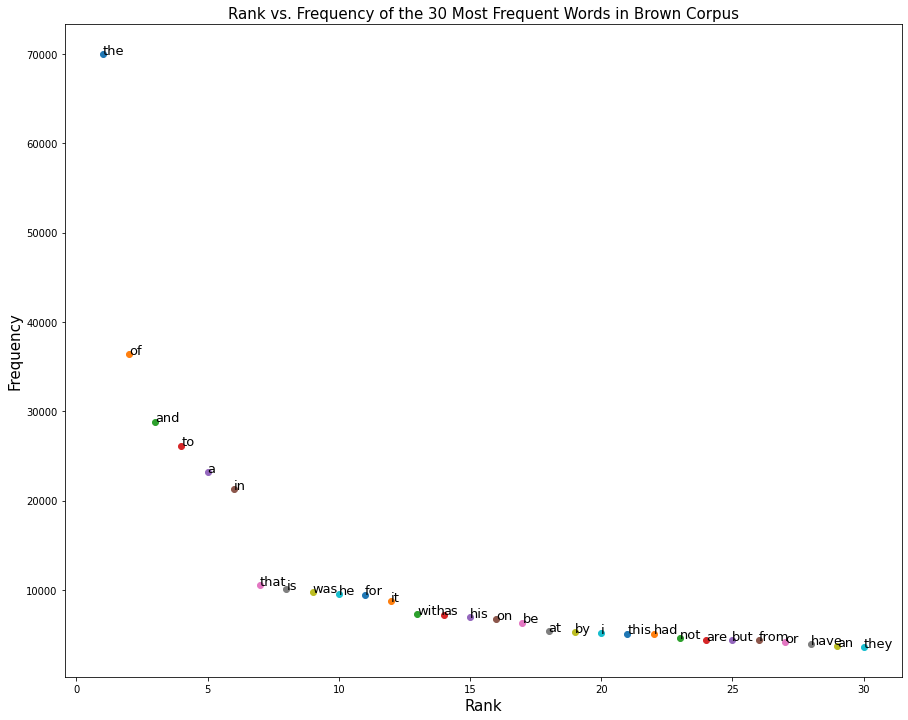

In [234]:
plt.figure(figsize = (15,12))

x=1

for word,freq in top30: 
  plt.scatter(x, freq)
  plt.annotate(f"{word}",( x, freq), fontsize=13)
  x +=1

plt.xlabel('Rank', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Rank vs. Frequency of the 30 Most Frequent Words in Brown Corpus', fontsize=15)

plt.show()

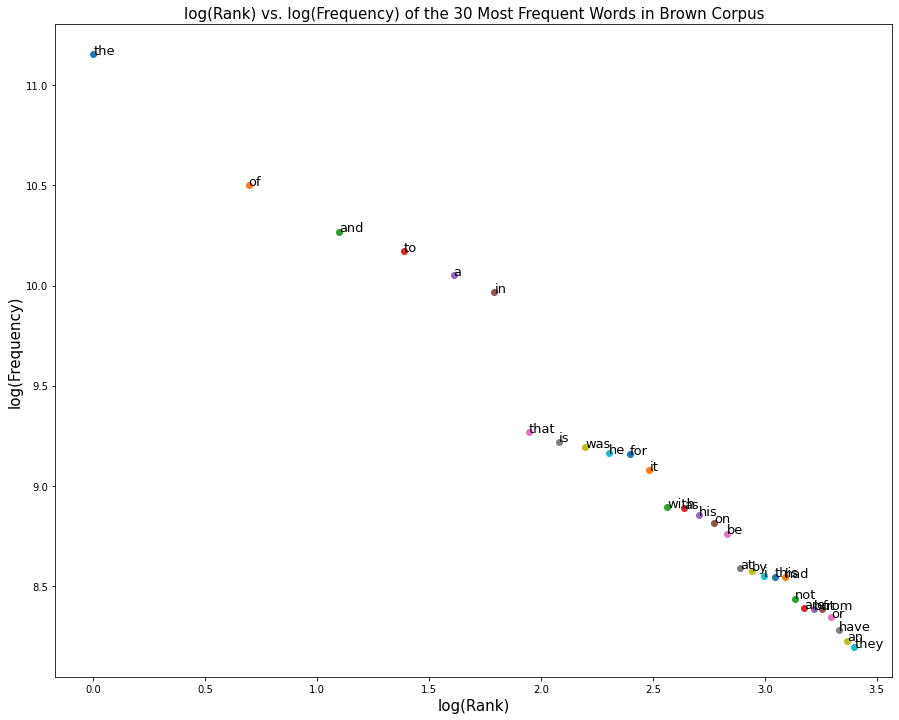

In [235]:
plt.figure(figsize = (15,12))

x=1

for word,freq in top30: 
  plt.scatter(x = np.log(x), y=np.log(freq))
  plt.annotate(f"{word}",( np.log(x), np.log(freq)), fontsize=13)
  x +=1

plt.xlabel('log(Rank)', fontsize=15)
plt.ylabel('log(Frequency)', fontsize=15)
plt.title('log(Rank) vs. log(Frequency) of the 30 Most Frequent Words in Brown Corpus', fontsize=15)

plt.show()

Note how relatively short all the most frequent words are.

#Wordcloud for Brown Corpus

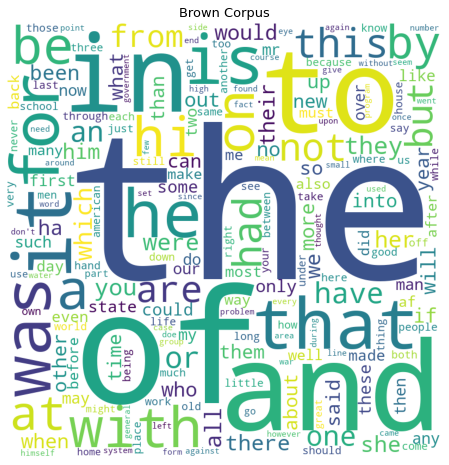

In [236]:
from wordcloud import WordCloud

plt.figure(figsize = (12,8))

#Preprocess the list of words from Brown 
brown_text = ' '.join(preprocess(brown_words))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, stopwords=[],collocations=False, random_state=2).generate(brown_text)

plt.imshow(wordcloud)
plt.title('Brown Corpus', fontsize = 13)
plt.axis('off')
plt.show()

#Wordcloud for every genre

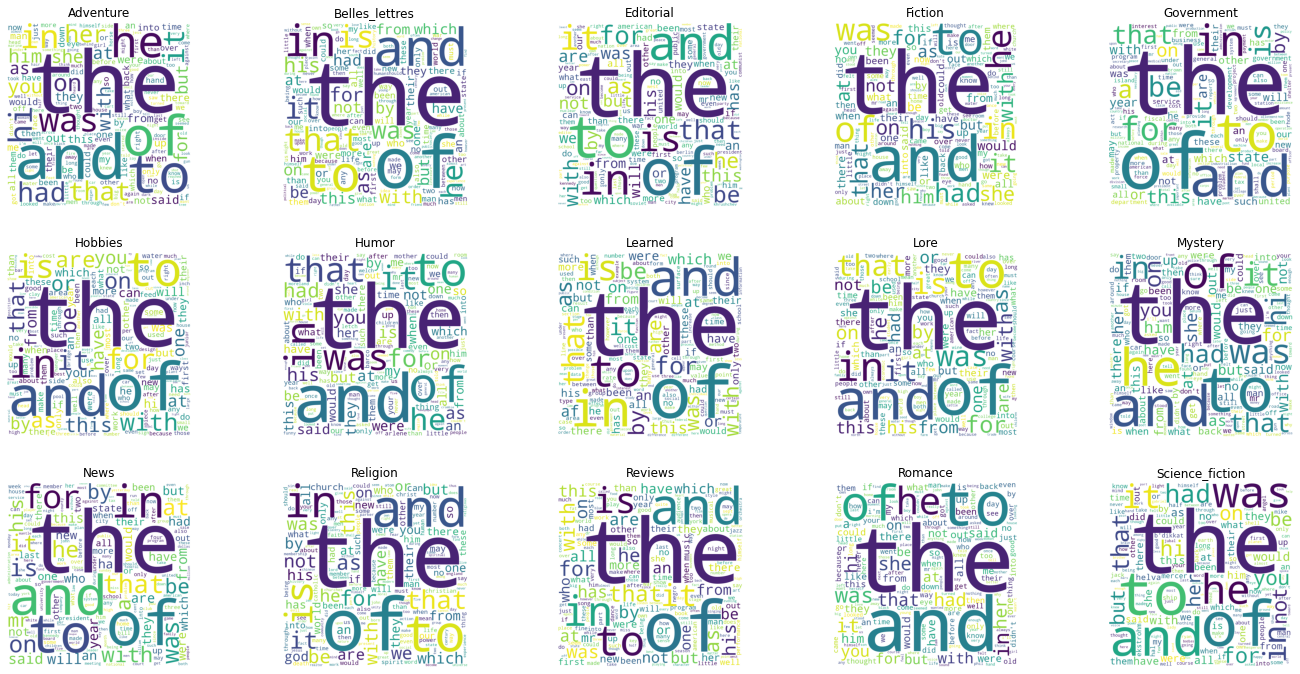

In [237]:
from wordcloud import WordCloud 

fig, ax = plt.subplots(3,5, figsize = (20,10))

count=0


#Loop over the rows
for i in range(3): 
  #Loop over the columns
  for j in range(5): 

    #get the genre we want to plot
    genre = genres[count]

    #Get the unprocessed list of all words for the genre
    genre_text = brown.words(categories = genre)

    #Process genre_text it and join every word in a comprehensive document
    genre_text = ' '.join(preprocess(genre_text))
    
    #Instantiate the wordcloud object
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, stopwords=[],collocations=False, random_state=1).generate(genre_text) 
    
    #Plot the wordcloud
    ax[i,j].imshow(wordcloud)
    ax[i,j].set_title(f"{genre.capitalize()}")
    ax[i,j].axis('off')
    
    #Increment count to get next genre in the next pass of the loop
    count+=1

plt.axis('off')
plt.tight_layout(pad = 3) 
plt.show()


#Plot Density Function of Scifi_Dist to check for 80/20 distribution (if top 20% of tokens comprise 80% of the total corpus).

In [238]:
vv = pd.DataFrame(scifi_dist.values(), index=range(1, len(scifi_dist)+1),columns = ['freq'])
vv

freq
1      723
2      329
3      306
4      294
5      236
...    ...
3014     1
3015     1
3016     1
3017     1
3018     1

[3018 rows x 1 columns]

In [239]:
np.cumsum(vv['freq'])

1         723
2        1052
3        1358
4        1652
5        1888
        ...  
3014    12036
3015    12037
3016    12038
3017    12039
3018    12040
Name: freq, Length: 3018, dtype: int64

In [240]:
vv['proportion'] = vv/ 12040
vv.head()

freq  proportion
1   723    0.060050
2   329    0.027326
3   306    0.025415
4   294    0.024419
5   236    0.019601

In [241]:
pp = np.cumsum(vv['proportion'])
pp

1       0.060050
2       0.087375
3       0.112791
4       0.137209
5       0.156811
          ...   
3014    0.999668
3015    0.999751
3016    0.999834
3017    0.999917
3018    1.000000
Name: proportion, Length: 3018, dtype: float64

In [242]:
#What is the index of pp that will give us a cumulative proportion of 50%? 

pp[pp>=.5]

87      0.501163
88      0.502492
89      0.503821
90      0.505150
91      0.506478
          ...   
3014    0.999668
3015    0.999751
3016    0.999834
3017    0.999917
3018    1.000000
Name: proportion, Length: 2932, dtype: float64

#CDF for Brown Corpus as a Whole

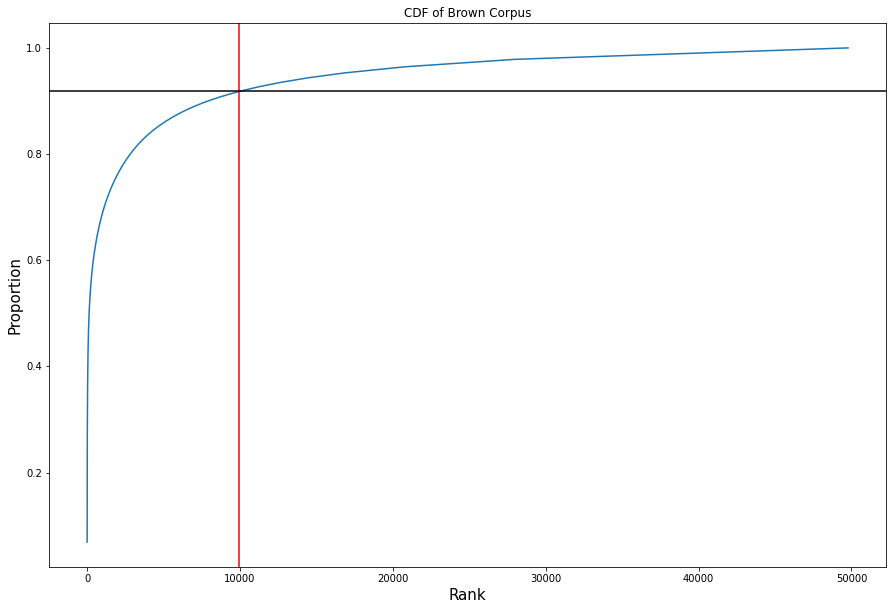

In [243]:
plt.figure(figsize = (15,10))

#Get the total number of words in the corpus (by summing the frequency of occurance for each word in the corpus)
total_words = sum(brown_dist.values())

#Get proportion of each word in corpus by dividing each word's frequency by the total number of words
prop_arr = np.array([i/total_words for i in brown_dist.values()])

#Get the cumulative sum pf prop_l to get the cumulative proportion up to that word
cum_prop = np.cumsum(prop_arr)
  
#Plot the CDF
sns.lineplot(x = range(1,len(brown_dist)+1), y = cum_prop)


#Draw the intersection of the red and black lines
#First, find the index of the word that makes 20% mark
idx_20 = round(.2*len(brown_dist))

#Find the cumulative frequency up to the word that represents the 20% mark by multiplying the length of the dictionary (ie the total # of unique tokens) by 0.2
cumprop_20 = cum_prop[idx_20]

#Plot the red and black lines
plt.axvline(x = idx_20, color = 'red')
plt.axhline(y = cumprop_20, color='black')

plt.title('CDF of Brown Corpus')
plt.xlabel('Rank', fontsize = 15)
plt.ylabel('Proportion', fontsize=15)

plt.show()

#Cumulative Density Function of Every Genre 



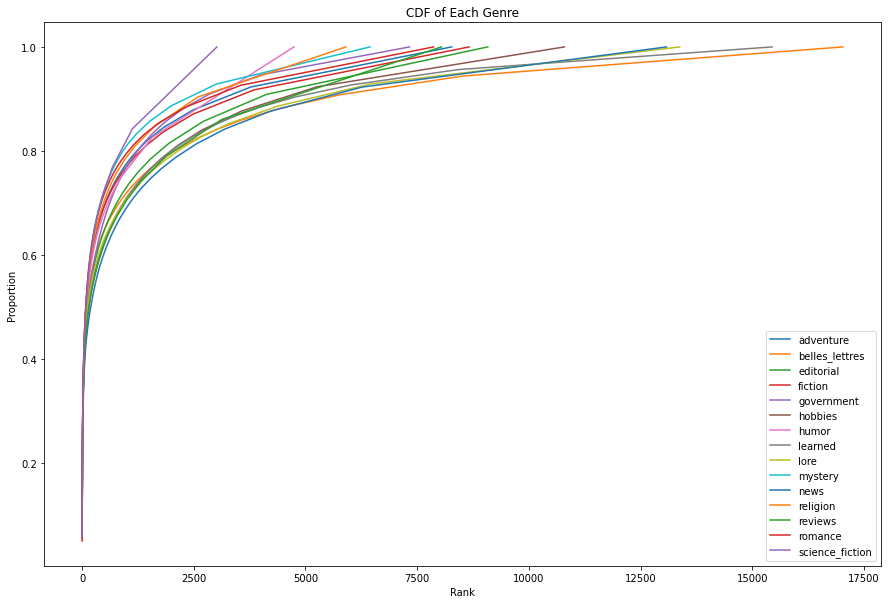

In [244]:
plt.figure(figsize = (15,10))

for genre in genres: 
  freq_dist = genre_freqdict[genre]

  #Get the total number of words in the corpus (by summing the frequency of occurance for each word in the corpus)
  total_words = sum(freq_dist.values())

  #Get proportion of each word in corpus by dividing each word's frequency by the total number of words
  prop_arr = np.array([i/total_words for i in freq_dist.values()])

  #Get the cumulative sum pf prop_l to get the cumulative proportion up to that word
  cum_prop = np.cumsum(prop_arr)
  
  #Plot the CDF
  sns.lineplot(x = range(1,len(freq_dist)+1), y = cum_prop)

  # #Draw the intersection of the red and black lines
  # #First, find the index of the word that makes 20% mark
  # idx_20 = round(.2*len(freq_dist))

  # #Find the cumulative frequency up to the word that represents the 20% mark by multiplying the length of the dictionary (ie the total # of unique tokens) by 0.2
  # cumprop_20 = cum_prop[idx_20]

  # #Plot the red and black lines
  # plt.axvline(x = idx_20, color = 'red')
  # plt.axhline(y = cumprop_20, color='black')

plt.title('CDF of Each Genre')
plt.xlabel('Rank')
plt.ylabel('Proportion')

plt.legend(genres)
plt.show()

Okay, maybe plot the red and black lines on a separate graph lol.

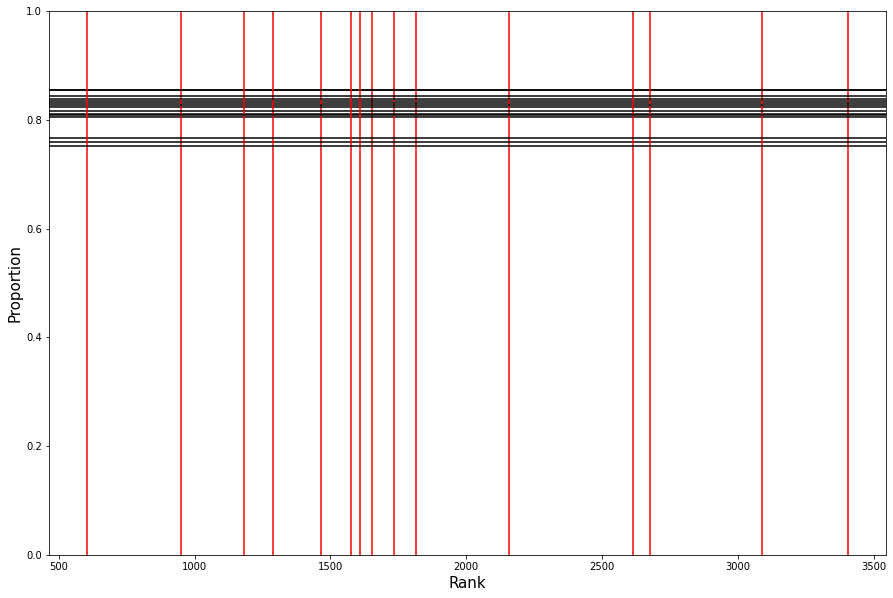

In [245]:
plt.figure(figsize = (15,10))

for genre in genres: 
  freq_dist = genre_freqdict[genre]

  #Get the total number of words in the corpus
  total_words = sum(freq_dist.values())

  #Get proportion of each word in corpus by dividing the frequency of that word by the total number of words
  prop_arr = np.array([i/total_words for i in freq_dist.values()])

  #Get the cumulative sum of prop_arr to calculate a list of the cumulative proportion up to that word
  cum_prop = np.cumsum(prop_arr)
  
  #Draw the intersection of the red and black lines
  #First, find the index of the word that makes 20% mark by multiplying the length of the dictionary (ie the total # of unique tokens) by 0.2
  idx_20 = round(.2*len(freq_dist))

  #Find the cumulative frequency up to the word that represents the 20% mark
  cumprop_20 = cum_prop[idx_20]

  #Plot the red and black lines
  plt.axvline(x = idx_20, color ='red')
  plt.axhline(y = cumprop_20, color='black') 


plt.xlabel('Rank', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.show()

#What proportion of the total number of words each genre corpus does "the" comprise?

In [246]:
def the_proportion(dist): 
  '''
  Input: Frequency distribution of a particular corpus. 
  Output: The proportion of the corpus that "the" comprises 
  '''

  #Get the total number of words in the corpus
  total_words = sum(dist.values())

  #get the proportion by dividing the frequency of "the" for that corpus by the total number of words in the corpus
  proportion = round(dist['the'] / total_words, 4)

  return proportion


In [247]:
for genre in genres: 
  genre_dist = genre_freqdict[genre]
  proportion = the_proportion(genre_dist)
  print(f"'The' comprises {proportion*100: .2f}% of the {genre} genre.")
  

'The' comprises  6.47% of the adventure genre.
'The' comprises  7.08% of the belles_lettres genre.
'The' comprises  7.28% of the editorial genre.
'The' comprises  6.50% of the fiction genre.
'The' comprises  7.44% of the government genre.
'The' comprises  6.58% of the hobbies genre.
'The' comprises  5.62% of the humor genre.
'The' comprises  7.77% of the learned genre.
'The' comprises  7.18% of the lore genre.
'The' comprises  5.84% of the mystery genre.
'The' comprises  7.23% of the news genre.
'The' comprises  7.20% of the religion genre.
'The' comprises  6.72% of the reviews genre.
'The' comprises  5.10% of the romance genre.
'The' comprises  6.00% of the science_fiction genre.


#What proportion of the total number of words in the Brown corpus does "the" comprise?

In [248]:
brown_theProportion = the_proportion(brown_dist)

print(f"'The' comprises {brown_theProportion*100: .2f}% of the Brown Corpus.")



'The' comprises  6.92% of the Brown Corpus.


In [249]:
the_propList = []

for genre in genres: 
  genre_dist = genre_freqdict[genre]
  proportion = the_proportion(genre_dist)
  the_propList.append(proportion)

the_propList

[0.0647,
 0.0708,
 0.0728,
 0.065,
 0.0744,
 0.0658,
 0.0562,
 0.0777,
 0.0718,
 0.0584,
 0.0723,
 0.072,
 0.0672,
 0.051,
 0.06]

In [250]:
#Add into the_propList at index 0  the proportion for Brown Corpus 
the_propList.insert(0, .0692) 

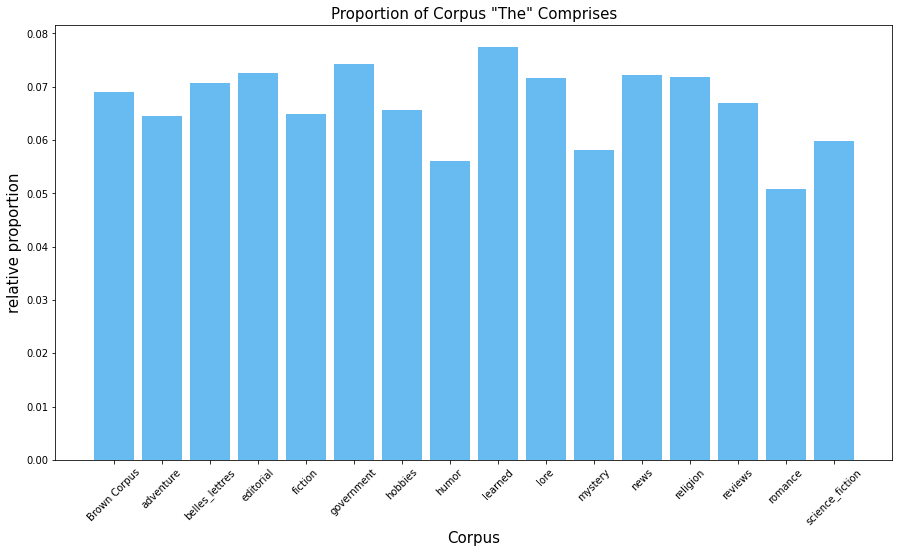

In [251]:
plt.figure(figsize = (15,8))

#The number of bars we'd like to plot. This is equal to the length of corpus_labels
r = range(len(corpus_labels))

for i in r: 
  plt.bar(r[i], the_propList[i], color ='#68BBF1',edgecolor='white', width=.85)


plt.title('Proportion of Corpus "The" Comprises', fontsize=15)
plt.xlabel('Corpus', fontsize = 15)
plt.ylabel('relative proportion', fontsize=15)
plt.xticks(r, corpus_labels, rotation = 45)
plt.show()

#How many words in the entire Brown Corpus are Hapax Legomenon?

**Pattern**: Almost all of the most frequently used words are short. You find that word length increased the less frequently it is used(much of the hapax legomena are relatively long words). There is an inverse relationship between frequency and word length. Or, there is a direct relationship between the rank of the word and the word length.

In [252]:
def hapax(dist): 
  '''
  Input: A frequency distribution of a particular corpus
  Output: The number of hapax legomena, and the proportion of hapax legomenon to the total number of tokens
  '''

  #Get the number of tokens in the corpus that are hapax legomena (ie frequency of the token equals 1)
  num_hapax = len([word for word,freq in dist.items() if freq == 1])

  #Find out what proportion of tokens in the corpus are hapax legomena
  prop_hapax = num_hapax / len(dist)

  return num_hapax, prop_hapax

In [253]:
num_hapax, prop_hapax = hapax(brown_dist)

print(f"There are {num_hapax} hapax legomena in the Brown Corpus and they form {prop_hapax*100 : .2f}% of all the tokens in the corpus.")

There are 22007 hapax legomena in the Brown Corpus and they form  44.21% of all the tokens in the corpus.


In [254]:
2207/sum(brown_dist.values())

0.0021827388575978005

#How many words in each genre are hapax legomena?

In [255]:
for genre in genres: 
  genre_dist = genre_freqdict[genre]
  num_hapax, prop_hapax = hapax(genre_dist)
  
  print(f"There are {num_hapax} hapax legomena in the {genre} genre and they form {prop_hapax*100 : .2f}% of all the tokens in the genre.")

There are 4509 hapax legomena in the adventure genre and they form  54.51% of all the tokens in the genre.
There are 8551 hapax legomena in the belles_lettres genre and they form  50.21% of all the tokens in the genre.
There are 4964 hapax legomena in the editorial genre and they form  54.66% of all the tokens in the genre.
There are 4835 hapax legomena in the fiction genre and they form  55.81% of all the tokens in the genre.
There are 3344 hapax legomena in the government genre and they form  45.61% of all the tokens in the genre.
There are 5550 hapax legomena in the hobbies genre and they form  51.41% of all the tokens in the genre.
There are 3172 hapax legomena in the humor genre and they form  66.89% of all the tokens in the genre.
There are 7062 hapax legomena in the learned genre and they form  45.72% of all the tokens in the genre.
There are 6942 hapax legomena in the lore genre and they form  51.90% of all the tokens in the genre.
There are 3446 hapax legomena in the mystery g

#Stacked Barchart for relative proportion of hapax legomena

In [256]:
#Get a list of the proportion of all tokens in each corpus that are hapax legomena
hapax_proportion = []

for genre in genres: 
  genre_dist = genre_freqdict[genre]
  num_hapax, prop_hapax = hapax(genre_dist)
  hapax_proportion.append(prop_hapax)

In [257]:
#Insert the proportion of hapax legomena for the entire Brown Corpus into the hapax_proportion list at index 0
hapax_proportion.insert(0, .4421)

In [258]:
hapax_proportion

[0.4421,
 0.5450918762088974,
 0.5020844342669251,
 0.5465756441312486,
 0.558056325023084,
 0.4561451370890738,
 0.5140792886254169,
 0.6689160691691269,
 0.45723535124635806,
 0.5189504373177842,
 0.5347610180012414,
 0.5221678642409417,
 0.5613886536833192,
 0.6123818995524615,
 0.5500063540475283,
 0.6275679257786614]

In [259]:
#New genre list called corpus_labels which includes 'Brown Corpus' at index 0. This is to provide the adequate xtick labels for the below stacked barchart 

corpus_labels = genres.copy()
corpus_labels.insert(0, 'Brown Corpus')


In [260]:
corpus_labels

['Brown Corpus',
 'adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

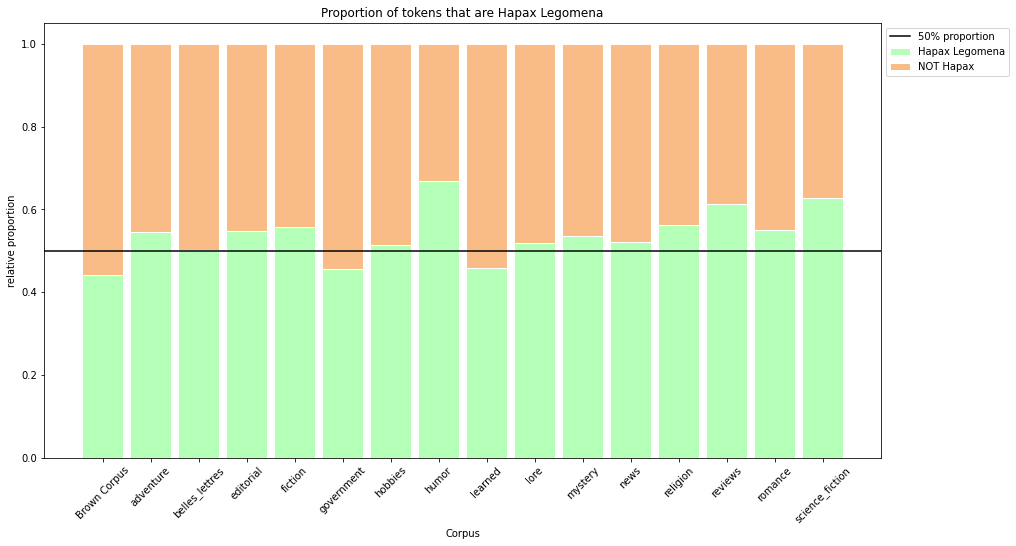

In [261]:
#Stacked barchart for hapax legomena in Brown Corpus and all the genres

plt.figure(figsize = (15,8))

#The number of bars we'd like to plot. This is equal to the length of corpus_labels
r = range(len(corpus_labels))

for i in r: 
  plt.bar(r[i], hapax_proportion[i], color ='#b5ffb9',edgecolor='white', width=.85, label = 'Hapax Legomena' )
  plt.bar(r[i], 1-hapax_proportion[i], color ='#f9bc86', bottom = hapax_proportion[i], edgecolor='white', width=.85, label = 'NOT Hapax Legomena' )


#Draw dotted horizontal black line marking 50% proportion 
plt.axhline(y = .50, color='black')

plt.title('Proportion of tokens that are Hapax Legomena')
plt.xlabel('Corpus')
plt.ylabel('relative proportion')
plt.xticks(r, corpus_labels, rotation = 45)
plt.legend(['50% proportion', 'Hapax Legomena', 'NOT Hapax'], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

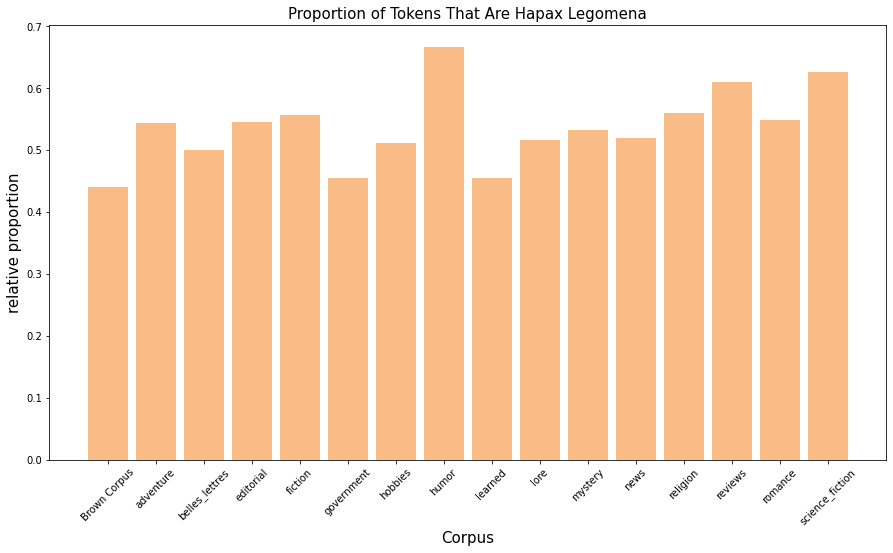

In [262]:
plt.figure(figsize = (15,8))

#The number of bars we'd like to plot. This is equal to the length of corpus_labels
r = range(len(corpus_labels))

for i in r: 
  plt.bar(r[i], hapax_proportion[i], color ='#f9bc86',edgecolor='white', width=.85, label = 'Hapax Legomena' )


plt.title('Proportion of Tokens That Are Hapax Legomena', fontsize=15)
plt.xlabel('Corpus', fontsize = 15)
plt.ylabel('relative proportion', fontsize=15)
plt.xticks(r, corpus_labels, rotation = 45)
plt.show()

#Below are all the hapax legomena in the Brown Corpus. Note that they all mostly on the relatively longer side

In [263]:
[word for word,freq in brown_dist.items() if freq == 1]

['fickle',
 'renfro',
 'angling',
 'frowzy',
 'greedily',
 'half-acre',
 "buckhorn's",
 'woebegone',
 'dejectedly',
 'rafter',
 'best-looking',
 'innocents',
 'scissors',
 'savvy',
 'rittenhouse',
 'splendide',
 'croaks',
 "'pache",
 'anythin',
 'driftin',
 'cinches',
 'looped',
 'somethin',
 'huskily',
 'untenanted',
 'palely',
 'gullies',
 'windless',
 "pettigrew's",
 "lester's",
 "cabot's",
 'silas',
 'pettigrew',
 'pennants',
 'enfield',
 'cap-and-ball',
 'tunic',
 'gagged',
 'blustered',
 'unutterably',
 'sop',
 'slouch',
 'parried',
 'backlash',
 'tethers',
 "fat's",
 "sentry's",
 'feds',
 'panted',
 'whack',
 'whoop',
 "stealin'",
 'half-clad',
 'canisters',
 'pallet',
 'shouldering',
 'snatching',
 'floundered',
 'whipsawed',
 'crossbars',
 'hovered',
 'thudding',
 'mudwagon',
 'gawdamighty',
 'gash',
 'hobble',
 "cap'n",
 'dirion',
 'unruffled',
 "fightin'",
 "hankerin'",
 "talkin'",
 "rev'rend",
 'stitched',
 'coyotes',
 'whinny',
 'unconcernedly',
 'quivered',
 'clout',
 'co

#Read in Satanic Bible and Process it

In [265]:
#Upload satanic bible txt from computer into the Colab Session

from google.colab import files
uploaded = files.upload()

Saving SatanicBible.txt to SatanicBible (2).txt


In [266]:
import re

NUMS = '1234567890'
PUNC = string.punctuation + "''``--"
FILTER_WORDS = NUMS+PUNC


def process_text(filename): 
  '''
  Input: The filename/filepath of the text to be read in and processed
  Output: List of all the preprocessed words in the text (provides same result as preprocess(brown.words(categories = genre)))
  '''

  #Initialize result list which will store all the processed words in the text
  result=[]

  #Read in file
  with open(filename) as file: 
    text = file.read()
  
  #Regex to filter out punctuation 
  text = re.sub(r'[^\w\s]','',text)

  #Split the document into all its constituent words
  text = text.split()

  #Convert every word in the list into lowercase
  text = [word.lower() for word in text]
  
  return text


In [267]:
satanic_text = process_text('/content/SatanicBible.txt')
satanic_text

['the',
 'satanic',
 'bible',
 'anton',
 'szandor',
 'lavey',
 'called',
 'the',
 'black',
 'pope',
 'by',
 'many',
 'of',
 'his',
 'followers',
 'anton',
 'lavey',
 'began',
 'the',
 'road',
 'to',
 'high',
 'priesthood',
 'of',
 'the',
 'church',
 'of',
 'satan',
 'when',
 'he',
 'was',
 'only',
 '16',
 'years',
 'old',
 'and',
 'an',
 'organ',
 'player',
 'in',
 'a',
 'carnival',
 'on',
 'saturday',
 'night',
 'i',
 'would',
 'see',
 'men',
 'lusting',
 'after',
 'halfnaked',
 'girls',
 'dancing',
 'at',
 'the',
 'carnival',
 'and',
 'on',
 'sunday',
 'morning',
 'when',
 'i',
 'was',
 'playing',
 'the',
 'organ',
 'for',
 'tentshow',
 'evangelists',
 'at',
 'the',
 'other',
 'end',
 'of',
 'the',
 'carnival',
 'lot',
 'i',
 'would',
 'see',
 'these',
 'same',
 'men',
 'sitting',
 'in',
 'the',
 'pews',
 'with',
 'their',
 'wives',
 'and',
 'children',
 'asking',
 'god',
 'to',
 'forgive',
 'them',
 'and',
 'purge',
 'them',
 'of',
 'carnal',
 'desires',
 'and',
 'the',
 'next',
 's

In [268]:
satanic_text = ' '.join(satanic_text)
satanic_text

'the satanic bible anton szandor lavey called the black pope by many of his followers anton lavey began the road to high priesthood of the church of satan when he was only 16 years old and an organ player in a carnival on saturday night i would see men lusting after halfnaked girls dancing at the carnival and on sunday morning when i was playing the organ for tentshow evangelists at the other end of the carnival lot i would see these same men sitting in the pews with their wives and children asking god to forgive them and purge them of carnal desires and the next saturday night theyd be back at the carnival or some other place of indulgence i knew then that the christian church thrives on hypocrisy and that mans carnal nature will out from that time early in his life his path was clear finally on the last night of april 1966 walpurgisnacht the most important festival of the believers in witchcraft lavey shaved his head in the tradition of ancient executioners and announced the formatio

#Wordcloud of Bible and Satanic Bible

In [269]:
#Preprocess the list of all words in the bible and feed it into wordcloud

bible_text = ' '.join(preprocess(bible_text))
bible_text

"the old testament of the king james bible the first book of moses called genesis in the beginning god created the heaven and the earth and the earth was without form and void and darkness was upon the face of the deep and the spirit of god moved upon the face of the waters and god said let there be light and there was light and god saw the light that it was good and god divided the light from the darkness and god called the light day and the darkness he called night and the evening and the morning were the first day and god said let there be a firmament in the midst of the waters and let it divide the waters from the waters and god made the firmament and divided the waters which were under the firmament from the waters which were above the firmament and it was so and god called the firmament heaven and the evening and the morning were the second day and god said let the waters under the heaven be gathered together unto one place and let the dry land appear and it was so 10 and god cal

In [270]:
bible_dist = get_freq_dist(bible_text.split())
bible_dist

{'the': 64022,
 'and': 51696,
 'of': 34670,
 'to': 13580,
 'that': 12912,
 'in': 12667,
 'he': 10419,
 'shall': 9838,
 'unto': 8997,
 'for': 8971,
 'i': 8854,
 'his': 8473,
 'a': 8177,
 'lord': 7964,
 'they': 7376,
 'be': 7013,
 'is': 6989,
 'him': 6659,
 'not': 6596,
 'them': 6430,
 'it': 6129,
 'with': 6012,
 'all': 5620,
 'thou': 5474,
 'thy': 4600,
 'was': 4522,
 'god': 4472,
 'which': 4413,
 'my': 4368,
 'me': 4096,
 'said': 3999,
 'but': 3992,
 'ye': 3983,
 'their': 3942,
 'have': 3904,
 'will': 3836,
 'thee': 3827,
 'from': 3642,
 'as': 3520,
 'are': 2950,
 'when': 2834,
 'this': 2785,
 'out': 2775,
 'were': 2772,
 'upon': 2748,
 'man': 2735,
 'by': 2624,
 'you': 2617,
 'israel': 2575,
 'king': 2542,
 'son': 2392,
 'up': 2380,
 'there': 2299,
 'hath': 2264,
 'then': 2169,
 'people': 2143,
 '10': 2117,
 '11': 2101,
 'came': 2093,
 'had': 2026,
 'house': 2024,
 'into': 2015,
 'on': 2011,
 'her': 1995,
 'come': 1971,
 'one': 1969,
 '13': 1905,
 '14': 1866,
 'we': 1844,
 'children':

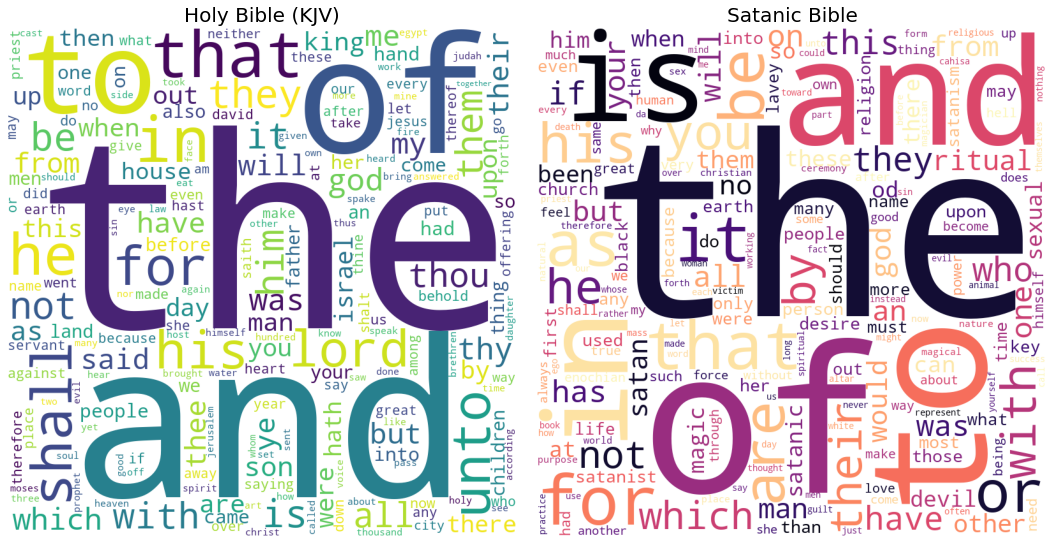

In [271]:
fig , ax = plt.subplots(1,2, figsize = (15,10))

#Wordcloud for Bible
bible_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, stopwords=[], collocations=False, random_state=1).generate(bible_text) 

ax[0].imshow(bible_wordcloud)
ax[0].axis('off')
ax[0].set_title('Holy Bible (KJV)', fontsize=20)

#Wordcloud for Satanic Bible
satanic_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap ='magma',
                min_font_size = 10, stopwords=[], collocations=False, random_state=1).generate(satanic_text) 

ax[1].imshow(satanic_wordcloud)
ax[1].axis('off')
ax[1].set_title('Satanic Bible', fontsize = 20)


#plt.figure(figsize = (8, 8), facecolor = None) 
#plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 2) 
  
plt.show() 

#Bible and Satanic Bible wordclouds with relative scaling equal to 1 (meaning a word that's twice as frequent as another will be exactly twice as big as the other word).

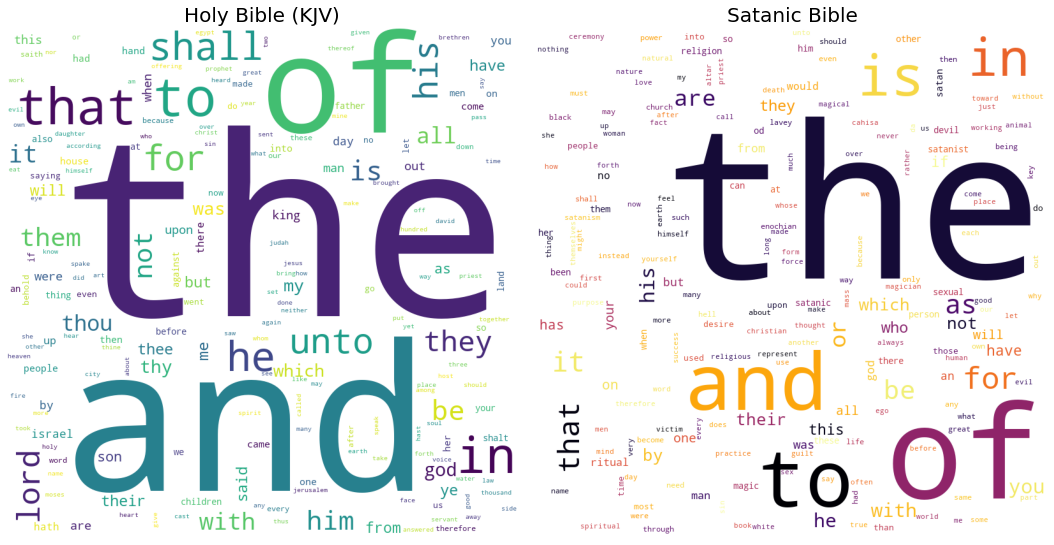

In [272]:
fig , ax = plt.subplots(1,2, figsize = (15,10))

#Wordcloud for Bible
bible_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, stopwords=[], collocations=False, relative_scaling=1, random_state=1).generate(bible_text) 

ax[0].imshow(bible_wordcloud)
ax[0].axis('off')
ax[0].set_title('Holy Bible (KJV)', fontsize=20)

#Wordcloud for Satanic Bible
satanic_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap ='inferno',
                min_font_size = 10, stopwords=[], collocations=False, relative_scaling=1, random_state=1).generate(satanic_text) 

ax[1].imshow(satanic_wordcloud)
ax[1].axis('off')
ax[1].set_title('Satanic Bible', fontsize=20)


#plt.figure(figsize = (8, 8), facecolor = None) 
#plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 2) 
  
plt.show() 

In [273]:
satanic_dist = get_freq_dist(satanic_text.split())
satanic_dist

{'the': 2854,
 'of': 1738,
 'to': 1072,
 'and': 1061,
 'a': 783,
 'is': 754,
 'in': 690,
 'for': 413,
 'that': 398,
 'as': 361,
 'be': 356,
 'it': 329,
 'or': 313,
 'are': 312,
 'his': 274,
 'you': 267,
 'he': 255,
 'with': 253,
 'by': 218,
 'which': 217,
 'their': 216,
 'not': 214,
 'they': 200,
 'who': 200,
 'this': 191,
 'have': 187,
 'if': 183,
 'on': 165,
 'has': 162,
 'your': 158,
 'will': 154,
 'all': 152,
 'was': 144,
 'one': 139,
 'from': 134,
 'but': 133,
 'an': 132,
 'would': 119,
 'i': 118,
 'no': 118,
 'satan': 110,
 'god': 108,
 'them': 103,
 'ritual': 101,
 'been': 100,
 'can': 97,
 'man': 96,
 'at': 94,
 'sexual': 94,
 'satanic': 92,
 'od': 92,
 'these': 91,
 'when': 89,
 'so': 87,
 'there': 84,
 'magic': 84,
 'him': 84,
 'her': 83,
 'into': 79,
 'most': 78,
 'than': 77,
 'people': 77,
 'upon': 77,
 'person': 76,
 'used': 75,
 'other': 73,
 'those': 73,
 'do': 72,
 'satanist': 70,
 'only': 69,
 'may': 69,
 'must': 68,
 'out': 66,
 'devil': 65,
 'earth': 65,
 'life': 64,

#Log-log rank v freq chart for Bible and Satanic Bible

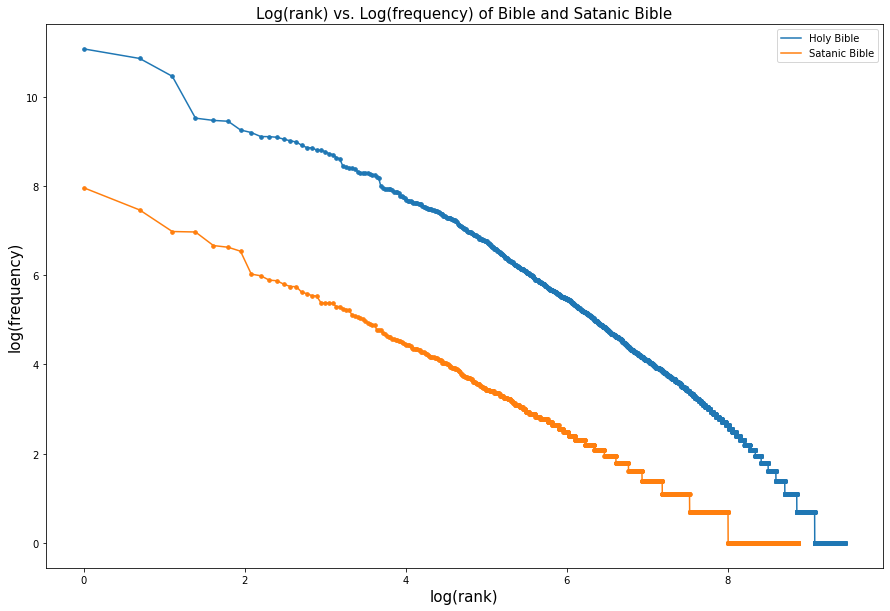

In [274]:
fig = plt.subplots(figsize=(15,10))

#Plot bible
plt.scatter(x=np.log(range(1,len(bible_dist)+1)), y=np.log(list(bible_dist.values())), s=13)
plt.plot(np.log(range(1,len(bible_dist)+1)), np.log(list(bible_dist.values())))

#Plot Satanic Bible
plt.scatter(x=np.log(range(1,len(satanic_dist)+1)), y=np.log(list(satanic_dist.values())), s=13)
plt.plot(np.log(range(1,len(satanic_dist)+1)), np.log(list(satanic_dist.values())))


plt.xlabel('log(rank)', fontsize = 15)
plt.ylabel('log(frequency)', fontsize = 15)
plt.title('Log(rank) vs. Log(frequency) of Bible and Satanic Bible', fontsize = 15)
plt.legend(['Holy Bible', 'Satanic Bible'])
plt.show()

#What % of tokens make up 50% of the corpus?

In [275]:
def tokens50Percent(dist): 
  '''
  Input: A frequency distribution for a particular text
  Output: numTokens_50, which represent the number of tokens that together account for 50% of all word occurences in the corpus,
          totalTokens, which represent the total number of unique tokens in the text, 
          and propTokens, the proportion numTokens_50 forms of totalTokens.
  '''

  #Get total number of words in the text
  total_words = sum(dist.values())

  #Get total number of unique tokens in text
  total_tokens = len(dist)
  
  #Get list of proportions for each particular token 
  token_proportion = [i/total_words for i in dist.values()]
  
  #get cumulative proportion
  cumsum = np.cumsum(token_proportion)

  #Get the number of the most frequent tokens that account for 50% of all words in the text.  
  numTokens_50 = [i for i,percent in enumerate(cumsum) if percent>=.5][0]

  #The proprortion of total tokens in the text that account for 50% of all word occurences
  propTokens = round((numTokens_50/total_tokens), 4)


  return numTokens_50, total_tokens, propTokens


In [276]:
numTokens = []
prop=[]
for genre in genres: 
  genre_dist = genre_freqdict[genre]

  numTokens_50, total_tokens,  propTokens = tokens50Percent(genre_dist)

  numTokens.append(numTokens_50)
  prop.append(propTokens)

  print(f"{numTokens_50} tokens ({propTokens*100 : .2f}% of total tokens) comprise 50% of the {genre} genre, which contain a total of {total_tokens} tokens.")


90 tokens ( 1.09% of total tokens) comprise 50% of the adventure genre, which contain a total of 8272 tokens.
102 tokens ( 0.60% of total tokens) comprise 50% of the belles_lettres genre, which contain a total of 17031 tokens.
122 tokens ( 1.34% of total tokens) comprise 50% of the editorial genre, which contain a total of 9082 tokens.
84 tokens ( 0.97% of total tokens) comprise 50% of the fiction genre, which contain a total of 8664 tokens.
121 tokens ( 1.65% of total tokens) comprise 50% of the government genre, which contain a total of 7331 tokens.
152 tokens ( 1.41% of total tokens) comprise 50% of the hobbies genre, which contain a total of 10796 tokens.
93 tokens ( 1.96% of total tokens) comprise 50% of the humor genre, which contain a total of 4742 tokens.
136 tokens ( 0.88% of total tokens) comprise 50% of the learned genre, which contain a total of 15445 tokens.
126 tokens ( 0.94% of total tokens) comprise 50% of the lore genre, which contain a total of 13377 tokens.
82 tokens

From the result above, it looks like the larger the corpus, the fewer percentage of tokens required to account for 50% of the corpus.

In [277]:
qq = pd.DataFrame(prop, numTokens).reset_index()
qq.columns = ['Num_tokens', 'prop']
#qq.index = genres
qq

Num_tokens    prop
0           90  0.0109
1          102  0.0060
2          122  0.0134
3           84  0.0097
4          121  0.0165
5          152  0.0141
6           93  0.0196
7          136  0.0088
8          126  0.0094
9           82  0.0127
10         191  0.0146
11          84  0.0142
12         149  0.0185
13          80  0.0102
14          86  0.0285

What's the best way to visualize the number of tokens and proportion of tokens needed to comprise 50% of the entire corpus for all genres???

In [278]:
total_words = sum(brown_dist.values())

#Get total number of unique tokens in text
total_tokens = len(brown_dist)
  
#Get list of proportions for each particular token 
token_proportion = [i/total_words for i in brown_dist.values()]
  
#get cumulative proportion
cumsum = np.cumsum(token_proportion)

#Get the number of the most frequent tokens that account for 50% of all words in the text.  
numTokens = [i for i,percent in enumerate(cumsum) if percent>=.5][0]

print(f"{numTokens} tokens ({(numTokens/total_tokens)*100 : .2f}% of total tokens) comprise 50% of the Brown Corpus, which contain a total of {total_tokens} tokens.")


131 tokens ( 0.26% of total tokens) comprise 50% of the Brown Corpus, which contain a total of 49778 tokens.
